In [2758]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
matplotlib.style.use('ggplot')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

RSEED = 12

PATH = 'D:\\DA\\Kaggle\\House Prices\\'

In [2759]:
data_train = pd.read_csv(PATH + 'train.csv')
data_test = pd.read_csv(PATH + 'test.csv')
data_subm = pd.read_csv(PATH + 'sample_submission.csv')

In [2760]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2761]:
data_subm.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [2762]:
data_train['SalePrice'] = np.log1p(data_train['SalePrice'])
y = data_train['SalePrice']

# Exploratory Data Analysis & New Features Generation

In [2763]:
data_train.shape, data_test.shape, data_subm.shape

((1460, 81), (1459, 80), (1459, 2))

In [2764]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [2765]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.000000,365.750000,730.500000,1095.250000,1460.000000
MSSubClass,1460.0,56.897260,42.300571,20.000000,20.000000,50.000000,70.000000,190.000000
LotFrontage,1201.0,70.049958,24.284752,21.000000,59.000000,69.000000,80.000000,313.000000
LotArea,1460.0,10516.828082,9981.264932,1300.000000,7553.500000,9478.500000,11601.500000,215245.000000
OverallQual,1460.0,6.099315,1.382997,1.000000,5.000000,6.000000,7.000000,10.000000
OverallCond,1460.0,5.575342,1.112799,1.000000,5.000000,5.000000,6.000000,9.000000
YearBuilt,1460.0,1971.267808,30.202904,1872.000000,1954.000000,1973.000000,2000.000000,2010.000000
YearRemodAdd,1460.0,1984.865753,20.645407,1950.000000,1967.000000,1994.000000,2004.000000,2010.000000
MasVnrArea,1452.0,103.685262,181.066207,0.000000,0.000000,0.000000,166.000000,1600.000000
BsmtFinSF1,1460.0,443.639726,456.098091,0.000000,0.000000,383.500000,712.250000,5644.000000


In [2766]:
data_train.groupby('YrSold')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
YrSold,,,,,,,,
2006,314.0,12.034991,0.393756,10.471978,11.785807,12.007597,12.295832,13.345509
2007,329.0,12.050674,0.396502,10.579005,11.774528,12.025755,12.299112,13.534474
2008,304.0,12.014212,0.380646,10.596660,11.784861,12.007609,12.240479,13.008662
2009,338.0,12.008744,0.420300,10.460271,11.738069,11.995358,12.267876,13.275829
2010,175.0,12.001079,0.406819,10.915107,11.760574,11.951187,12.270224,13.323929


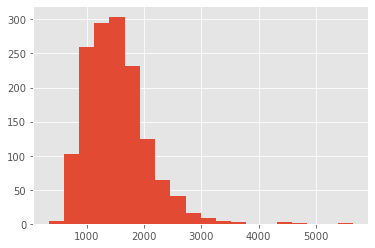

In [2767]:
data_train['GrLivArea'].hist(bins=20);

In [2768]:
livarea_perc = []
for i in range(10):
    livarea_perc.append(np.percentile(data_train['GrLivArea'], (i+1)*10))
livarea_perc

[912.0,
 1066.6000000000001,
 1208.0,
 1339.0,
 1464.0,
 1578.0,
 1709.3,
 1869.0,
 2158.3,
 5642.0]

In [2769]:
def get_livarea_range(area):
    for i in range(len(livarea_perc)):
        if(area <= livarea_perc[i]):
            return i+1
    return len(livarea_perc)

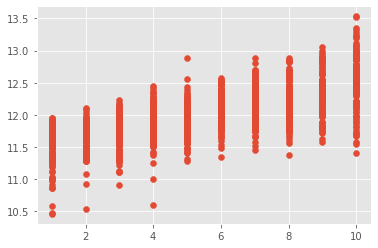

In [2770]:
plt.scatter(data_train['GrLivArea'].map(get_livarea_range), data_train['SalePrice']);

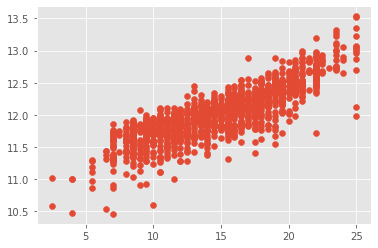

In [2771]:
plt.scatter(data_train['GrLivArea'].map(get_livarea_range) + 1.5*data_train['OverallQual'], data_train['SalePrice']);

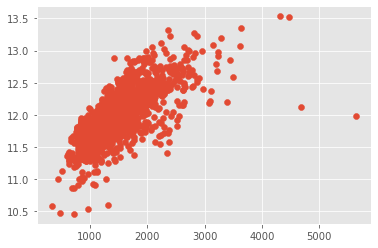

In [2772]:
plt.scatter(data_train['GrLivArea'], data_train['SalePrice']);

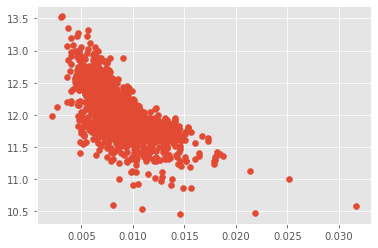

In [2773]:
plt.scatter(data_train['SalePrice'] / data_train['GrLivArea'], data_train['SalePrice']);

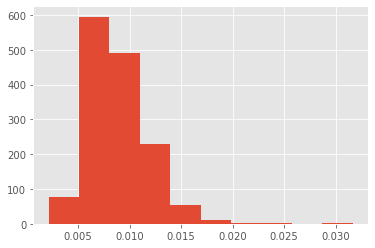

In [2774]:
(data_train['SalePrice'] / data_train['GrLivArea']).hist();

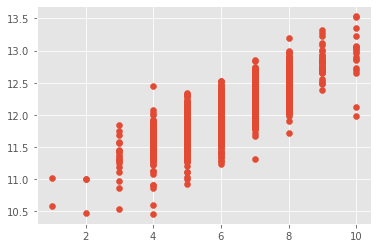

In [2775]:
plt.scatter(data_train['OverallQual'], data_train['SalePrice']);

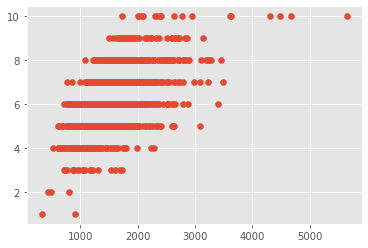

In [2776]:
plt.scatter(data_train['GrLivArea'], data_train['OverallQual']);

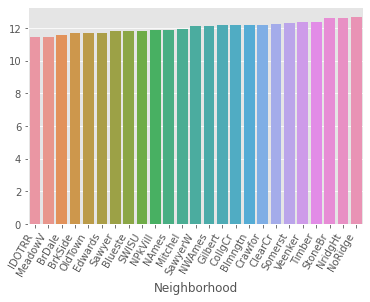

In [2777]:
bar = sns.barplot(x=data_train.groupby('Neighborhood')['SalePrice'].mean().sort_values().index, \
           y=data_train.groupby('Neighborhood')['SalePrice'].mean().sort_values().values)
labels = data_train.groupby('Neighborhood')['SalePrice'].mean().sort_values().index
bar.set_xticklabels(labels, rotation=60, ha='right');

In [2778]:
district_mean = dict(data_train.groupby('Neighborhood')['SalePrice'].mean().sort_values())

In [2779]:
data_train.drop(['Id', 'SalePrice'], axis=1, inplace=True)
data_test.drop(['Id'], axis=1, inplace=True)

In [2780]:
data_train.isna().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
CentralAir        0
SaleType          0
Heating           0
TotalBsmtSF       0
MSSubClass        0
Length: 79, dtype: int64

In [2781]:
data_all = pd.concat((data_train, data_test))

In [2782]:
subj_col_names = ['ExterQual',
'ExterCond',
'BsmtQual',
'BsmtCond',
'BsmtExposure',
'HeatingQC',
'KitchenQual',
'FireplaceQu',
'GarageQual',
'GarageCond',
'PoolQC']
uniqvalues = set()
for col in subj_col_names:
    for val in data_all[col].unique():
        if val not in uniqvalues:
            uniqvalues.add(val)
print(uniqvalues)

{nan, 'Av', 'Gd', 'Ex', 'Fa', 'Mn', 'No', 'TA', 'Po'}


In [2783]:
subj_dict = {'Av': 3, 'Gd': 4, 'Ex': 5, 'Fa': 2, 'Mn': 2, 'No': 0, 'TA': 3, 'Po': 1}
for col in subj_col_names:
    data_train[col] = data_train[col].map(subj_dict)
    data_test[col] = data_test[col].map(subj_dict)   

In [2784]:
livarea_perc = []
for i in range(10):
    livarea_perc.append(np.percentile(data_all['GrLivArea'], (i+1)*10))
livarea_perc

[923.8,
 1064.6,
 1200.0,
 1329.2,
 1444.0,
 1560.0,
 1680.0,
 1838.4,
 2153.2000000000003,
 5642.0]

In [2785]:
def get_livarea_range(area):
    for i in range(len(livarea_perc)):
        if(area <= livarea_perc[i]):
            return i+1
    return len(livarea_perc)

In [2786]:
data_train['AreaQualityMix'] = data_train['GrLivArea'].map(get_livarea_range) + 2 * data_train['OverallQual']
data_test['AreaQualityMix'] = data_test['GrLivArea'].map(get_livarea_range) + 2 * data_test['OverallQual']

In [2787]:
data_train['Neighborhood'] = data_train['Neighborhood'].map(district_mean)
data_test['Neighborhood'] = data_test['Neighborhood'].map(district_mean)

In [2788]:
cat_col_names = list(data_test.dtypes[data_test.dtypes=='object'].index) + ['MSSubClass']
num_col_names = list(set(data_test.columns) - set(cat_col_names))
cat_col_inds = [data_test.columns.get_loc(col_name) for col_name in cat_col_names]

In [2789]:
data_train[num_col_names].head()

,YearRemodAdd,LowQualFinSF,OpenPorchSF,GarageCond,KitchenAbvGr,KitchenQual,2ndFlrSF,Neighborhood,EnclosedPorch,TotRmsAbvGrd,...,1stFlrSF,LotFrontage,YrSold,BsmtHalfBath,MiscVal,Fireplaces,BsmtUnfSF,MoSold,GarageArea,GarageQual
0,2003,0,61,3.0,1,4,854,12.163647,0,8,...,856,65.0,2008,0,0,0,150,2,548,3.0
1,1976,0,0,3.0,1,3,0,12.344180,0,6,...,1262,80.0,2007,1,0,1,284,5,460,3.0
2,2002,0,42,3.0,1,4,866,12.163647,0,6,...,920,68.0,2008,0,0,1,434,9,608,3.0
3,1970,0,35,3.0,1,4,756,12.206664,272,7,...,961,60.0,2006,0,0,1,540,2,642,3.0
4,2000,0,84,3.0,1,4,1053,12.676003,0,9,...,1145,84.0,2008,0,0,1,490,12,836,3.0


In [2790]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for col in cat_col_names:
    enc.fit(data_all[col].astype(str))
    data_train[col] = enc.transform(data_train[col].astype(str))
    data_test[col] = enc.transform(data_test[col].astype(str))

In [2791]:
from scipy.spatial import distance
from tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Returns mean target value of count closest objects for each object in (X_train_sc, X_test_sc)
# Version 2
def get_mean_target(X_train, X_test, num_cols, target, count):
    train_size, test_size = X_train.shape[0], X_test.shape[0]
    X_train_df = pd.DataFrame()
    X_test_df = pd.DataFrame()
    cat_cols = list(set(X_test.columns.values.tolist()) - set(num_cols))
    X_all_cat_df = pd.concat([X_train[cat_cols], X_test[cat_cols]])
    
    for col in num_cols:  
        X_train_df[col] = X_train[col].fillna(X_train[col].median())
        X_test_df[col] = X_test[col].fillna(X_test[col].median())
    
    scaler = StandardScaler()
    X_num_all = pd.concat((X_train_df, X_test_df), axis=0)
    scaler.fit(X_num_all)
    X_train_arr = scaler.transform(X_train_df)
    X_test_arr = scaler.transform(X_test_df)

    for col in cat_cols:
        X_all_cat_df[col] = X_all_cat_df[col].fillna('NA').astype(str)

    encoder = OneHotEncoder(sparse=False)
    X_all_cat = encoder.fit_transform(X_all_cat_df)  
    X_train_cat = X_all_cat[:train_size]
    X_test_cat = X_all_cat[train_size:]

    X_train_sc = np.hstack((X_train_arr, X_train_cat))
    X_test_sc = np.hstack((X_test_arr, X_test_cat))
    
    median_list = np.zeros(train_size + test_size)
    for i in tqdm(range(train_size + test_size)):
        obj = X_train_sc[i] if i < train_size else X_test_sc[i - train_size]
        dst = []  #list: [object_index, distance_to_object]
        for j in range(train_size):
            if i!=j:
                dst.append([j, distance.euclidean(obj, X_train_sc[j])])
        dst.sort(key=lambda x: x[1])
        idx = [x[0] for x in dst[:count]]  # Indexes of the closest objects
        target_list = [target.values[x] for x in idx]
        median_list[i] = np.mean(target_list)
    return median_list[:train_size], median_list[train_size:]

In [2792]:
data_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,AreaQualityMix
0,10,3,65.0,8450,1,2,3,3,0,4,...,0,NaN,4,4,0,2,2008,8,4,22
1,5,3,80.0,9600,1,2,3,3,0,2,...,0,NaN,4,4,0,5,2007,8,4,16
2,10,3,68.0,11250,1,2,0,3,0,4,...,0,NaN,4,4,0,9,2008,8,4,22
3,11,3,60.0,9550,1,2,0,3,0,0,...,0,NaN,4,4,0,2,2006,8,0,22
4,10,3,84.0,14260,1,2,0,3,0,2,...,0,NaN,4,4,0,12,2008,8,4,26


In [2793]:
a, b = get_mean_target(data_train, data_test, num_col_names, y, 5)
data_train['MeanTarget'] = a
data_test['MeanTarget'] = b

100%|██████████████████████████████████████| 2919/2919 [00:42<00:00, 68.39it/s]


In [2794]:
data_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,AreaQualityMix,MeanTarget
0,10,3,65.0,8450,1,2,3,3,0,4,...,NaN,4,4,0,2,2008,8,4,22,12.290826
1,5,3,80.0,9600,1,2,3,3,0,2,...,NaN,4,4,0,5,2007,8,4,16,12.144619
2,10,3,68.0,11250,1,2,0,3,0,4,...,NaN,4,4,0,9,2008,8,4,22,12.278298
3,11,3,60.0,9550,1,2,0,3,0,0,...,NaN,4,4,0,2,2006,8,0,22,11.917952
4,10,3,84.0,14260,1,2,0,3,0,2,...,NaN,4,4,0,12,2008,8,4,26,12.634537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,10,3,62.0,7917,1,2,3,3,0,4,...,NaN,4,4,0,8,2007,8,4,19,12.089265
1456,5,3,85.0,13175,1,2,3,3,0,4,...,NaN,2,4,0,2,2010,8,4,21,11.951520
1457,11,3,66.0,9042,1,2,3,3,0,4,...,NaN,0,2,2500,5,2010,8,4,24,12.312987
1458,5,3,68.0,9717,1,2,3,3,0,4,...,NaN,4,4,0,4,2010,8,4,13,12.001734


# CatBoost Implementing

In [2795]:
X_train, X_valid, y_train, y_valid = train_test_split(data_train, y, test_size=0.5, random_state=RSEED)

In [2796]:
from catboost import CatBoostRegressor
ctb = CatBoostRegressor(depth=6, iterations=1000, learning_rate=0.04, random_seed=RSEED,
                        l2_leaf_reg=5,
                       )

In [2797]:
ctb.fit(X_train, y_train, cat_features=cat_col_inds, eval_set=(X_valid, y_valid), plot=True, verbose=100)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.3879649	test: 0.3888227	best: 0.3888227 (0)	total: 40.2ms	remaining: 40.2s
100:	learn: 0.1233362	test: 0.1441682	best: 0.1441682 (100)	total: 4.82s	remaining: 42.9s
200:	learn: 0.0989535	test: 0.1342662	best: 0.1342662 (200)	total: 9.67s	remaining: 38.4s
300:	learn: 0.0854378	test: 0.1330728	best: 0.1326896 (288)	total: 14.6s	remaining: 34s
400:	learn: 0.0787133	test: 0.1329968	best: 0.1326896 (288)	total: 19.6s	remaining: 29.2s
500:	learn: 0.0727119	test: 0.1333331	best: 0.1326896 (288)	total: 24.7s	remaining: 24.6s
600:	learn: 0.0668314	test: 0.1331744	best: 0.1326896 (288)	total: 29.8s	remaining: 19.8s
700:	learn: 0.0617096	test: 0.1331379	best: 0.1326896 (288)	total: 34.6s	remaining: 14.8s
800:	learn: 0.0566135	test: 0.1330665	best: 0.1326896 (288)	total: 39.6s	remaining: 9.84s
900:	learn: 0.0523334	test: 0.1330859	best: 0.1326896 (288)	total: 44.5s	remaining: 4.89s
999:	learn: 0.0483866	test: 0.1330923	best: 0.1326896 (288)	total: 49.5s	remaining: 0us

bestTest = 0.132

In [2798]:
ctb.fit(data_train, y, cat_features=cat_col_inds, verbose=100)

0:	learn: 0.3880498	total: 35.1ms	remaining: 35.1s
100:	learn: 0.1206904	total: 4.7s	remaining: 41.8s
200:	learn: 0.1030535	total: 9.3s	remaining: 37s
300:	learn: 0.0945182	total: 14s	remaining: 32.5s
400:	learn: 0.0879524	total: 18.8s	remaining: 28.2s
500:	learn: 0.0834481	total: 23.5s	remaining: 23.4s
600:	learn: 0.0776562	total: 28.4s	remaining: 18.9s
700:	learn: 0.0724930	total: 33.4s	remaining: 14.2s
800:	learn: 0.0682008	total: 38.3s	remaining: 9.51s
900:	learn: 0.0642481	total: 43.2s	remaining: 4.74s
999:	learn: 0.0606249	total: 47.9s	remaining: 0us


In [2799]:
y_pred = ctb.predict(data_test)

In [2800]:
feat_imp = dict(zip(data_train.columns, ctb.get_feature_importance()))
feat_dict = sorted(feat_imp.items(), key=lambda item: item[1], reverse=True)
{k: v for k, v in feat_dict}

{'MeanTarget': 36.770520351241586,
 'AreaQualityMix': 12.020848212938256,
 'GrLivArea': 5.2841102627792775,
 'Neighborhood': 4.000565964502927,
 'OverallQual': 3.715824481063409,
 'TotalBsmtSF': 3.151710188581482,
 'BsmtFinSF1': 2.5096963898879667,
 'OverallCond': 2.4044231852544016,
 '1stFlrSF': 2.2441849221268155,
 'LotArea': 2.0259225975389703,
 'CentralAir': 1.6604848214076786,
 'GarageCars': 1.4317642438412557,
 'YearBuilt': 1.4178678569207936,
 'BsmtQual': 1.4162371747351237,
 'SaleCondition': 1.323853748505595,
 'FireplaceQu': 1.2717051273861053,
 'GarageArea': 0.9246564179138258,
 'MSZoning': 0.920536408383175,
 'HeatingQC': 0.9122062330154213,
 'YearRemodAdd': 0.8852374817286087,
 'TotRmsAbvGrd': 0.7367901456057873,
 'KitchenQual': 0.7247230944924011,
 'Fireplaces': 0.710949661320851,
 '2ndFlrSF': 0.6844038838821901,
 'GarageYrBlt': 0.5396144203661403,
 'BsmtExposure': 0.5123306352161591,
 'LandContour': 0.4904982702355321,
 'FullBath': 0.43196887410300716,
 'BsmtFinType1': 0.

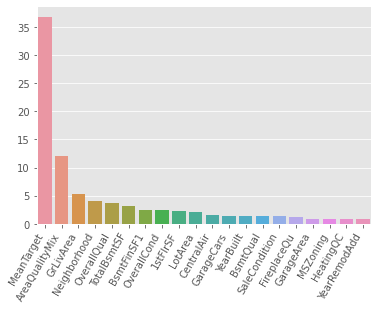

In [2801]:
bar = sns.barplot(x=list(map(lambda x: x[0], feat_dict))[:20], \
           y=list(map(lambda x: x[1], feat_dict))[:20]);
labels = list(map(lambda x: x[0], feat_dict))[:20]
bar.set_xticklabels(labels, rotation=60, ha='right');

In [2802]:
y_pred = np.expm1(y_pred)

In [2803]:
data_subm['SalePrice'] = y_pred
data_subm.to_csv(PATH + 'submission_ctb.csv', index=False)